In [192]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
%matplotlib inline

In [2]:
# Converting CSV to DataFrame
file="csv_data/HCAHPS - Hospital.csv"
file2="csv_data/Hospital General Information.csv"
file3="csv_data/Structural Measures - Hospital.csv"
hospital=pd.read_csv(file) #contain hospital ID, name, and address
hospital_Gen_Info=pd.read_csv(file2) # contain hospital type and and ownership
hospital_Efiles=pd.read_csv(file3) #contain hospital and whether it has electronic lab results capabilities

In [3]:
hospital.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW


In [4]:
hospital_Gen_Info.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Hospital Type,Hospital Ownership,Emergency Services
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,Acute Care Hospitals,Government - Hospital District or Authority,Yes
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,Acute Care Hospitals,Government - Hospital District or Authority,Yes
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,Acute Care Hospitals,Government - Hospital District or Authority,Yes
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,Acute Care Hospitals,Voluntary non-profit - Private,Yes
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,Acute Care Hospitals,Proprietary,Yes


In [5]:
hospital_Efiles.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Measure Name,Measure ID,Measure Response
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,Able to receive lab results electronically,OP_12,Yes
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,"Able to track patients' lab results, tests, an...",OP_17,No
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,Able to receive lab results electronically,OP_12,Yes
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,"Able to track patients' lab results, tests, an...",OP_17,Yes
4,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,Able to receive lab results electronically,OP_12,Yes


In [6]:
# coding: utf-8

# In[2]:
import pandas as pd
import numpy as np
# In[3]:
zip_data = pd.read_csv("zip_codes_states.csv")
# In[4]:
zip_data.head()
# In[5]:
zip_codes = []
for z in zip_data["zip"]:
    if len(str(z))==3:
        z = "00"+str(z)
    else:
        if len(str(z))==4:
            z = "0"+str(z)
        else:
            z = str(z)
    zip_codes.append(z)
zip_data["zip_code"]=zip_codes
# In[6]:
zip_data = zip_data.drop(["zip"],axis=1)
zip_data = zip_data.rename(columns={'zip_code':'ZIP Code'})
zip_data['ZIP Code'].astype(str)
zip_data.head()

,ZIP Code,latitude,longitude,city,state,county
0,00501,40.922326,-72.637078,Holtsville,NY,Suffolk
1,00544,40.922326,-72.637078,Holtsville,NY,Suffolk
2,00601,18.165273,-66.722583,Adjuntas,PR,Adjuntas
3,00602,18.393103,-67.180953,Aguada,PR,Aguada
4,00603,18.455913,-67.145780,Aguadilla,PR,Aguadilla


In [7]:
# In[7]:
claim_data = pd.read_csv("Medicare Hospital Spending by Claim.csv")
# In[8]:
claim_data = claim_data.sort_values("Provider_ID")
df = pd.DataFrame(claim_data.loc[claim_data['Claim_Type']=="Total"])
df = df.drop(["Percent_of_Spending_Hospital","Percent_of_Spending_State","Percent_of_Spending_Nation","Period","Claim_Type"],axis=1)
df.to_csv("hospital_claim_data",sep="\t")
# In[9]:
df = df.rename(columns={'Hospital_Name':'Hospital Name'})
df.head()

,Hospital Name,Provider_ID,State,Avg_Spending_Per_Episode_Hospital,Avg_Spending_Per_Episode_State,Avg_Spending_Per_Episode_Nation,Start_Date,End_Date
17083,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,20711,19139,20302,1012016,12312016
56338,MARSHALL MEDICAL CENTERS,10005,AL,16849,19139,20302,1012016,12312016
21475,ELIZA COFFEE MEMORIAL HOSPITAL,10006,AL,19553,19139,20302,1012016,12312016
17084,MIZELL MEMORIAL HOSPITAL,10007,AL,15899,19139,20302,1012016,12312016
65059,CRENSHAW COMMUNITY HOSPITAL,10008,AL,12254,19139,20302,1012016,12312016


In [8]:
master = hospital_Gen_Info.merge(df,on='Hospital Name',how="inner")


In [9]:
master = master.drop(['State_y'],axis=1)


In [10]:
master = master.rename(columns={'State_x':'State'})
master.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Hospital Type,Hospital Ownership,Emergency Services,Provider_ID,Avg_Spending_Per_Episode_Hospital,Avg_Spending_Per_Episode_State,Avg_Spending_Per_Episode_Nation,Start_Date,End_Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,Acute Care Hospitals,Government - Hospital District or Authority,Yes,10001,20711,19139,20302,1012016,12312016
1,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,Acute Care Hospitals,Government - Hospital District or Authority,Yes,10006,19553,19139,20302,1012016,12312016
2,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,Acute Care Hospitals,Voluntary non-profit - Private,Yes,10007,15899,19139,20302,1012016,12312016
3,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,Acute Care Hospitals,Proprietary,Yes,10008,12254,19139,20302,1012016,12312016
4,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,Acute Care Hospitals,Proprietary,Yes,10012,15112,19139,20302,1012016,12312016


In [11]:
election_data = pd.read_csv("csv_data/election_data.csv",header=1)

In [12]:
election_data['political score'] = 0
dem_score = -(election_data['d']+election_data['d.1']+election_data['d.2']+election_data['d.3']+election_data['d.4'])/5
rep_score = (election_data['r']+election_data['r.1']+election_data['r.2']+election_data['r.3']+election_data['r.4'])/5
election_data['political score']=(dem_score + rep_score)
election_data.head()

,State,State Abbrv,d,r,d.1,r.1,d.2,r.2,d.3,r.3,d.4,r.4,political score
0,Nationwide,NaN,48.0,45.9,51.0,47.1,52.9,45.6,48.3,50.7,48.4,47.9,-2.28
1,Alabama,AL,34.4,62.1,38.4,60.5,38.7,60.3,36.8,62.5,41.6,56.5,22.40
2,Alaska,AK,36.6,51.3,40.8,54.8,37.9,59.4,35.5,61.1,27.7,58.6,21.34
3,Arizona,AZ,44.6,48.1,44.4,53.5,44.9,53.4,44.3,54.8,44.7,51.0,7.58
4,Arkansas,AR,33.7,60.6,36.9,60.6,38.9,58.7,44.5,54.3,45.9,51.3,17.12


In [13]:
poli_score_df = election_data.drop(columns=['State','d','r','d.1','r.1','d.2','r.2',
                                           'd.3','r.3','d.4','r.4'])
poli_score_df = poli_score_df.dropna()
poli_score_df = poli_score_df.rename(columns={'State Abbrv':'State'})
poli_score_df = poli_score_df.set_index('State')
poli_score_df.head()

,political score
State,
AL,22.40
AK,21.34
AZ,7.58
AR,17.12
CA,-19.74


In [14]:
hospital_by_state = pd.DataFrame(master['State'].value_counts())
hospital_by_state.head()
poli_health_df = poli_score_df.join(hospital_by_state)
poli_health_df = poli_health_df.rename(columns={'State':'Hospitals'})
poli_health_df.head()

,political score,Hospitals
State,,
AL,22.40,72
AK,21.34,8
AZ,7.58,59
AR,17.12,42
CA,-19.74,314


In [15]:
api_key = "1383ed6d1c178075bb6c33d544f4a17d700c9607"
c = Census(api_key, year=2016)
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'state:*'})


# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name", "state": "State"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["State", "Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate"]]
census_pd.head()

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,01,Alabama,4841164.0,38.6,44758.0,24736.0,868666.0,17.943329,3.810633
1,02,Alaska,736855.0,33.6,74444.0,34191.0,72826.0,9.883356,4.090221
2,04,Arizona,6728577.0,37.1,51340.0,26686.0,1165636.0,17.323663,3.715080
3,05,Arkansas,2968472.0,37.7,42336.0,23401.0,542431.0,18.273071,3.139326
4,06,California,38654206.0,36.0,63783.0,31458.0,6004257.0,15.533257,4.355868


In [135]:
census_df = census_pd.drop(columns=['State'])
census_df = census_df.rename(columns={'Name':'State'})
census_df = election_data.merge(census_df,on='State',how="inner")
df10 = census_df
census_df.head()

,State,State Abbrv,d,r,d.1,r.1,d.2,r.2,d.3,r.3,d.4,r.4,political score,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,Alabama,AL,34.4,62.1,38.4,60.5,38.7,60.3,36.8,62.5,41.6,56.5,22.40,4841164.0,38.6,44758.0,24736.0,868666.0,17.943329,3.810633
1,Alaska,AK,36.6,51.3,40.8,54.8,37.9,59.4,35.5,61.1,27.7,58.6,21.34,736855.0,33.6,74444.0,34191.0,72826.0,9.883356,4.090221
2,Arizona,AZ,44.6,48.1,44.4,53.5,44.9,53.4,44.3,54.8,44.7,51.0,7.58,6728577.0,37.1,51340.0,26686.0,1165636.0,17.323663,3.715080
3,Arkansas,AR,33.7,60.6,36.9,60.6,38.9,58.7,44.5,54.3,45.9,51.3,17.12,2968472.0,37.7,42336.0,23401.0,542431.0,18.273071,3.139326
4,California,CA,61.5,31.5,60.2,37.1,60.9,36.9,54.3,44.4,53.4,41.7,-19.74,38654206.0,36.0,63783.0,31458.0,6004257.0,15.533257,4.355868


In [17]:
census_df = census_df[['State Abbrv','Population']]
census_df = census_df.rename(columns={'State Abbrv':'State'})


In [18]:
census_df = census_df.set_index("State")
census_df.head()

,Population
State,
AL,4841164.0
AK,736855.0
AZ,6728577.0
AR,2968472.0
CA,38654206.0


In [19]:
poli_health_df.head()


,political score,Hospitals
State,,
AL,22.40,72
AK,21.34,8
AZ,7.58,59
AR,17.12,42
CA,-19.74,314


In [20]:
census_poli_df = poli_health_df.join(census_df)

In [21]:
census_poli_df['Hospitals per 100,000'] = census_poli_df['Hospitals']/census_poli_df['Population']*100000

In [22]:
m1 = census_poli_df['Hospitals per 100,000'].mean()
census_poli_df['+/- Natl Avg'] = (census_poli_df['Hospitals per 100,000'] - m1)/m1

In [198]:
census_poli_df = census_poli_df.sort_values('Hospitals per 100,000')
census_poli_df.head()

,political score,Hospitals,Population,"Hospitals per 100,000",+/- Natl Avg
State,,,,,
MD,-21.46,3,5959902.0,0.050336,-0.954460
NJ,-13.94,49,8915456.0,0.549607,-0.502767
MA,-25.72,41,6742143.0,0.608115,-0.449835
NY,-24.16,122,19697457.0,0.619369,-0.439653
CT,-16.28,23,3588570.0,0.640924,-0.420153


In [24]:
df2=census_poli_df

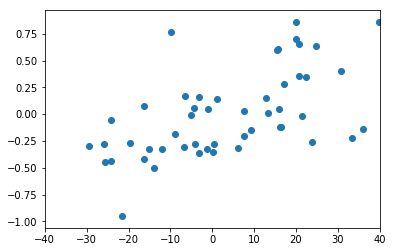

In [25]:
#hospitals per capita against political score
plt.scatter(df2['political score'],df2['+/- Natl Avg'])
plt.xlim(-40,40)
plt.show()

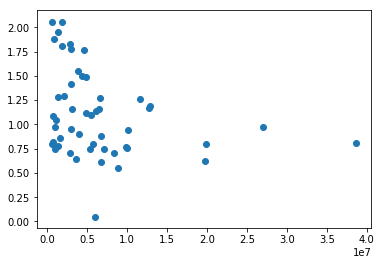

In [26]:
#Population against hospitals per capita 
plt.scatter(df2['Population'],df2['Hospitals per 100,000'])
plt.show()

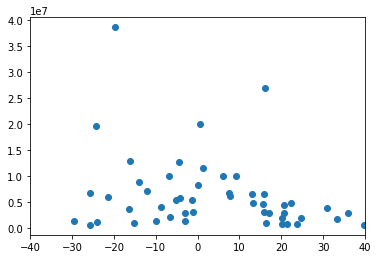

In [27]:
#Political score against population
plt.scatter(df2['political score'],df2['Population'])
plt.xlim(-40,40)
plt.show()

In [105]:
df3 = df2.merge(master,on="State")
df7 = df3
df3.head()

,State,political score,Hospitals,Population,"Hospitals per 100,000",+/- Natl Avg,Provider ID,Hospital Name,Address,City,...,County Name,Hospital Type,Hospital Ownership,Emergency Services,Provider_ID,Avg_Spending_Per_Episode_Hospital,Avg_Spending_Per_Episode_State,Avg_Spending_Per_Episode_Nation,Start_Date,End_Date
0,MD,-21.46,3,5959902.0,0.050336,-0.954460,210004,HOLY CROSS HOSPITAL,1500 FOREST GLEN ROAD,SILVER SPRING,...,MONTGOMERY,Acute Care Hospitals,Voluntary non-profit - Church,Yes,100073,22094,20502,20302,1012016,12312016
1,MD,-21.46,3,5959902.0,0.050336,-0.954460,210004,HOLY CROSS HOSPITAL,1500 FOREST GLEN ROAD,SILVER SPRING,...,MONTGOMERY,Acute Care Hospitals,Voluntary non-profit - Church,Yes,140133,19963,20456,20302,1012016,12312016
2,MD,-21.46,3,5959902.0,0.050336,-0.954460,210004,HOLY CROSS HOSPITAL,1500 FOREST GLEN ROAD,SILVER SPRING,...,MONTGOMERY,Acute Care Hospitals,Voluntary non-profit - Church,Yes,320013,15190,18911,20302,1012016,12312016
3,NJ,-13.94,49,8915456.0,0.549607,-0.502767,310119,UNIVERSITY HOSPITAL,150 BERGEN ST,NEWARK,...,ESSEX,Acute Care Hospitals,Government - State,Yes,110028,21518,19801,20302,1012016,12312016
4,NJ,-13.94,49,8915456.0,0.549607,-0.502767,310028,NEWTON MEDICAL CENTER,175 HIGH ST,NEWTON,...,SUSSEX,Acute Care Hospitals,Voluntary non-profit - Private,Yes,170103,18894,20103,20302,1012016,12312016


In [106]:
df3 = df3.drop_duplicates('State')
df3 = df3.sort_values('political score')
df3.head()

,State,political score,Hospitals,Population,"Hospitals per 100,000",+/- Natl Avg,Provider ID,Hospital Name,Address,City,...,County Name,Hospital Type,Hospital Ownership,Emergency Services,Provider_ID,Avg_Spending_Per_Episode_Hospital,Avg_Spending_Per_Episode_State,Avg_Spending_Per_Episode_Nation,Start_Date,End_Date
3056,DC,-82.50,8,NaN,NaN,NaN,90006,PROVIDENCE HOSPITAL,1150 VARNUM ST NE,WASHINGTON,...,THE DISTRICT,Acute Care Hospitals,Voluntary non-profit - Private,Yes,10090,20024,19139,20302,1012016,12312016
568,HI,-29.42,11,1413673.0,0.778115,-0.296035,120011,KAISER FOUNDATION HOSPITAL,3288 MOANALUA RD,HONOLULU,...,HONOLULU,Acute Care Hospitals,Voluntary non-profit - Private,Yes,120011,16736,19672,20302,1012016,12312016
738,VT,-25.82,5,626249.0,0.798404,-0.277679,470001,CENTRAL VERMONT MEDICAL CENTER,BOX 547,BARRE,...,WASHINGTON,Acute Care Hospitals,Voluntary non-profit - Private,Yes,470001,15899,19661,20302,1012016,12312016
52,MA,-25.72,41,6742143.0,0.608115,-0.449835,220111,GOOD SAMARITAN MEDICAL CENTER,235 NORTH PEARL STREET,BROCKTON,...,PLYMOUTH,Acute Care Hospitals,Proprietary,Yes,100287,19545,20502,20302,1012016,12312016
93,NY,-24.16,122,19697457.0,0.619369,-0.439653,330332,ST JOSEPH HOSPITAL,4295 HEMPSTEAD TURNPIKE,BETHPAGE,...,NASSAU,Acute Care Hospitals,Voluntary non-profit - Private,Yes,50006,18521,20846,20302,1012016,12312016


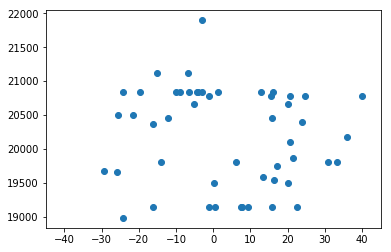

In [30]:
#avg spending per episode by political score
plt.scatter(df3['political score'],df3['Avg_Spending_Per_Episode_State'])
plt.xlim(-45,45)
plt.show()

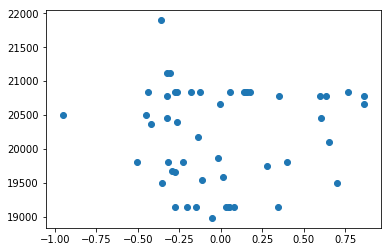

In [31]:
#hospitals per capita (% of national avg) against avg spending per episode
plt.scatter(df3['+/- Natl Avg'],df3['Avg_Spending_Per_Episode_State'])
plt.show()

In [90]:
df4 = pd.DataFrame(master['Hospital Ownership'].value_counts())
df4

,Hospital Ownership
Voluntary non-profit - Private,1246
Proprietary,621
Voluntary non-profit - Other,317
Government - Hospital District or Authority,307
Voluntary non-profit - Church,294
Government - Local,170
Physician,51
Government - State,31
Government - Federal,23
Tribal,4


In [209]:
df5 = pd.DataFrame(master.groupby(['Hospital Ownership'])['Avg_Spending_Per_Episode_State'].mean())
df5 = df5.sort_values(["Avg_Spending_Per_Episode_State"], ascending=False)

In [210]:
ownership = df5.index.tolist()
df5.head()

,Avg_Spending_Per_Episode_State
Hospital Ownership,
Physician,20824.450980
Proprietary,20485.433172
Government - Hospital District or Authority,20420.667752
Voluntary non-profit - Church,20357.472789
Voluntary non-profit - Other,20297.735016


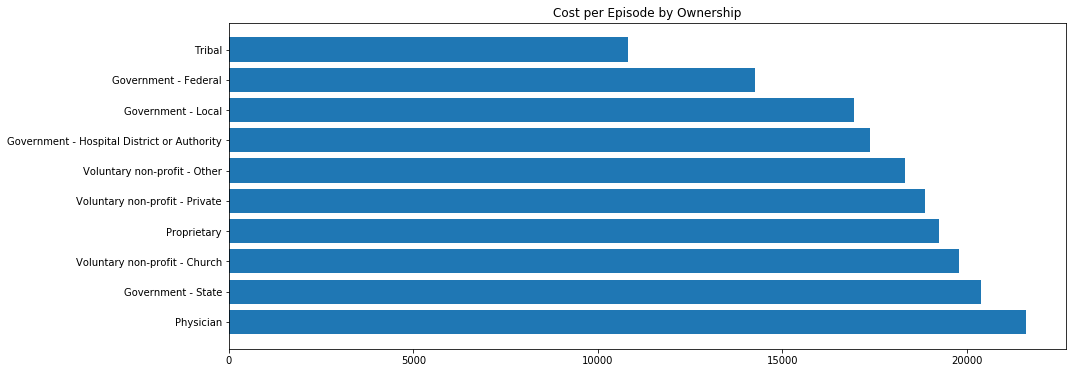

In [101]:
#cost per episode by ownership type
plt.barh(ownership,df5["Avg_Spending_Per_Episode_Hospital"])
plt.title("Cost per Episode by Ownership")
plt.show()

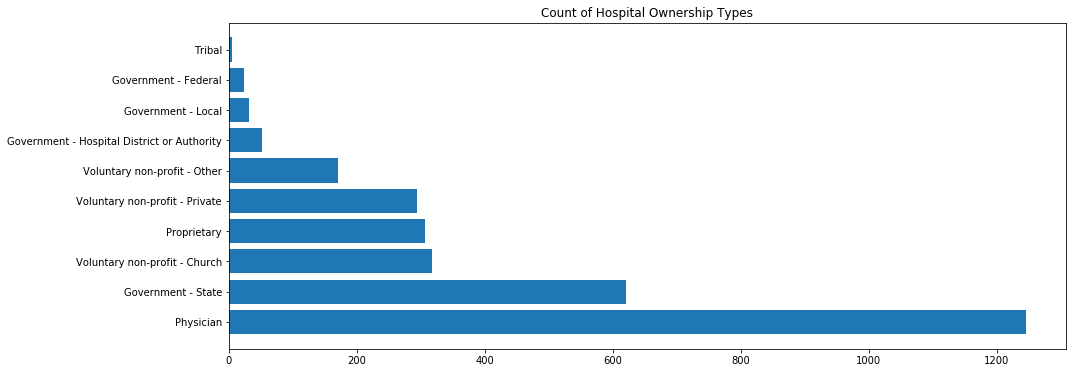

In [127]:
plt.barh(ownership,df4['Hospital Ownership'])
plt.title("Count of Hospital Ownership Types")
plt.show()

In [124]:
# top 5 most expensive
df6 = pd.DataFrame(master.groupby(['State'])['Avg_Spending_Per_Episode_Hospital'].mean())
df6 = df6.sort_values(['Avg_Spending_Per_Episode_Hospital'],ascending=False)
df6 = df6.astype(int)
df6.head()

,Avg_Spending_Per_Episode_Hospital
State,
NV,21340
NJ,21109
DC,20796
DE,20213
CO,19996


In [125]:
# top 5 least expensive
df6 = df6.sort_values(['Avg_Spending_Per_Episode_Hospital'],ascending=True)
df6.head()

,Avg_Spending_Per_Episode_Hospital
State,
AK,15810
AL,15978
NM,16060
VT,16131
MS,16596


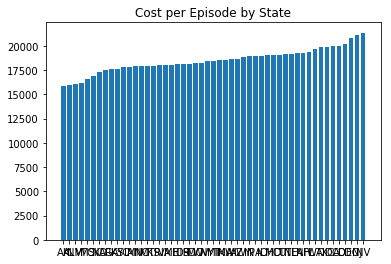

In [38]:
#cost per episode by state
state = df6.index.tolist()
plt.bar(state,df6['Avg_Spending_Per_Episode_Hospital'])
plt.title("Cost per Episode by State")
plt.show()

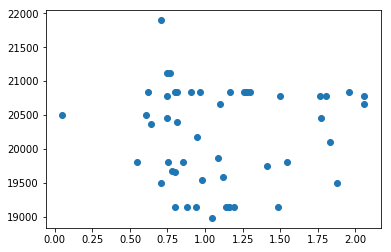

In [73]:
plt.scatter(df3['Hospitals per 100,000'],df3['Avg_Spending_Per_Episode_State'])
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


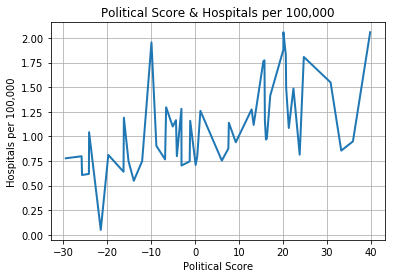

In [51]:
plt.plot(df3['political score'],df3['Hospitals per 100,000'],linewidth=)
plt.title('Political Score & Hospitals per 100,000')
plt.ylabel("Hospitals per 100,000")
plt.xlabel('Political Score')
plt.grid("True")
plt.show()

In [108]:
df8 = pd.DataFrame(df7.groupby(['Hospital Ownership'])['political score'].mean())
df8 = df8.sort_values(["political score"], ascending=False)
df8

,political score
Hospital Ownership,
Tribal,28.480000
Physician,13.918431
Government - Hospital District or Authority,9.004169
Government - Local,5.233412
Proprietary,5.072560
Government - Federal,4.152174
Government - State,2.527097
Voluntary non-profit - Private,-1.591108
Voluntary non-profit - Other,-1.670095


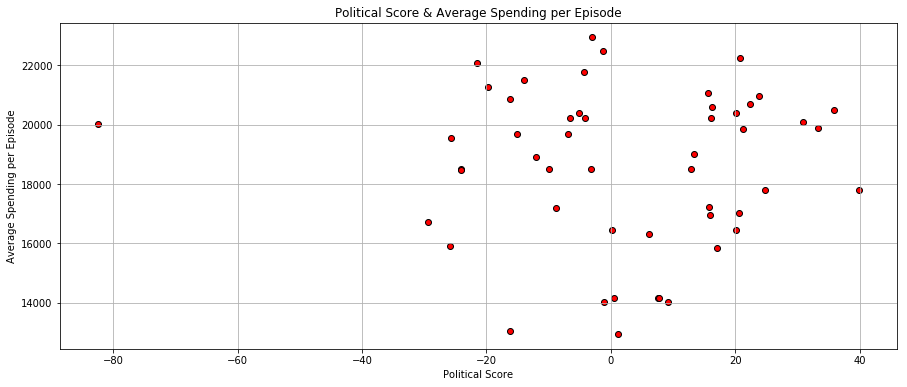

In [190]:
plt.scatter(df3['political score'],df3['Avg_Spending_Per_Episode_Hospital'],edgecolors="black",color="red")
plt.title("Political Score & Average Spending per Episode")
plt.ylabel("Average Spending per Episode")
plt.xlabel("Political Score")
plt.grid(True)
plt.show()

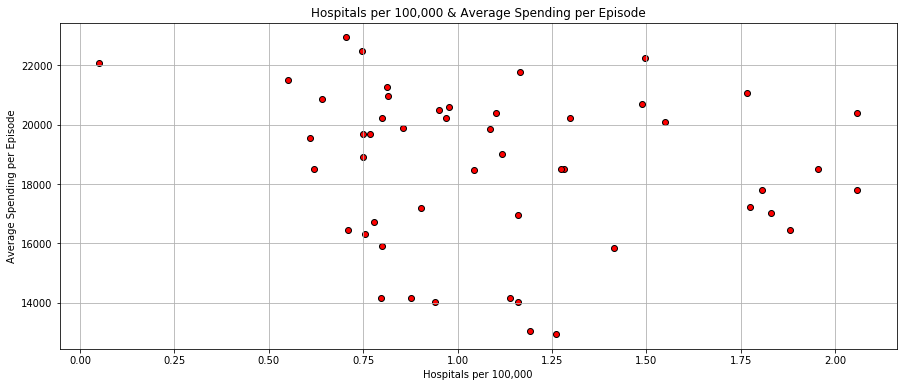

In [189]:
plt.scatter(df3['Hospitals per 100,000'],df3['Avg_Spending_Per_Episode_Hospital'],color="red",edgecolors="black")
plt.title("Hospitals per 100,000 & Average Spending per Episode")
plt.ylabel("Average Spending per Episode")
plt.xlabel("Hospitals per 100,000")
plt.grid(True)
plt.show()

In [128]:
df9 = df4.join(df8)

In [130]:
df9 = df9.rename(columns={"Hospital Ownership":"Hospital Count"})
df9

,Hospital Count,political score
Voluntary non-profit - Private,1246,-1.591108
Proprietary,621,5.072560
Voluntary non-profit - Other,317,-1.670095
Government - Hospital District or Authority,307,9.004169
Voluntary non-profit - Church,294,-3.078571
Government - Local,170,5.233412
Physician,51,13.918431
Government - State,31,2.527097
Government - Federal,23,4.152174
Tribal,4,28.480000


In [143]:
df10 = df10.rename(columns={"State Abbrv":"State"})
df10.head()

,State,d,r,d.1,r.1,d.2,r.2,d.3,r.3,d.4,r.4,political score,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,AL,34.4,62.1,38.4,60.5,38.7,60.3,36.8,62.5,41.6,56.5,22.40,4841164.0,38.6,44758.0,24736.0,868666.0,17.943329,3.810633
1,AK,36.6,51.3,40.8,54.8,37.9,59.4,35.5,61.1,27.7,58.6,21.34,736855.0,33.6,74444.0,34191.0,72826.0,9.883356,4.090221
2,AZ,44.6,48.1,44.4,53.5,44.9,53.4,44.3,54.8,44.7,51.0,7.58,6728577.0,37.1,51340.0,26686.0,1165636.0,17.323663,3.715080
3,AR,33.7,60.6,36.9,60.6,38.9,58.7,44.5,54.3,45.9,51.3,17.12,2968472.0,37.7,42336.0,23401.0,542431.0,18.273071,3.139326
4,CA,61.5,31.5,60.2,37.1,60.9,36.9,54.3,44.4,53.4,41.7,-19.74,38654206.0,36.0,63783.0,31458.0,6004257.0,15.533257,4.355868


In [139]:
master.head(1)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Hospital Type,Hospital Ownership,Emergency Services,Provider_ID,Avg_Spending_Per_Episode_Hospital,Avg_Spending_Per_Episode_State,Avg_Spending_Per_Episode_Nation,Start_Date,End_Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,Acute Care Hospitals,Government - Hospital District or Authority,Yes,10001,20711,19139,20302,1012016,12312016


In [156]:
df11 = df10.merge(df3,on="State",how="outer")
df11 = df11.sort_values(['Household Income'])
df11.head()

,State,d,r,d.1,r.1,d.2,r.2,d.3,r.3,d.4,...,County Name,Hospital Type,Hospital Ownership,Emergency Services,Provider_ID,Avg_Spending_Per_Episode_Hospital,Avg_Spending_Per_Episode_State,Avg_Spending_Per_Episode_Nation,Start_Date,End_Date
23,MS,40.1,57.9,43.8,55.3,43.0,56.2,39.8,59.4,40.7,...,MARION,Acute Care Hospitals,Voluntary non-profit - Other,Yes,150011,17225,20455,20302,1012016,12312016
3,AR,33.7,60.6,36.9,60.6,38.9,58.7,44.5,54.3,45.9,...,BENTON,Acute Care Hospitals,Voluntary non-profit - Other,Yes,40001,15851,19742,20302,1012016,12312016
47,WV,26.2,67.9,35.5,62.1,42.5,55.6,43.2,56.1,45.6,...,UPSHUR,Critical Access Hospitals,Voluntary non-profit - Private,Yes,30011,20391,20665,20302,1012016,12312016
0,AL,34.4,62.1,38.4,60.5,38.7,60.3,36.8,62.5,41.6,...,HOUSTON,Acute Care Hospitals,Government - Hospital District or Authority,Yes,10001,20711,19139,20302,1012016,12312016
16,KY,32.7,62.5,37.8,60.5,41.1,57.4,39.7,59.5,41.4,...,FAYETTE,Acute Care Hospitals,Voluntary non-profit - Church,Yes,60028,22266,20773,20302,1012016,12312016


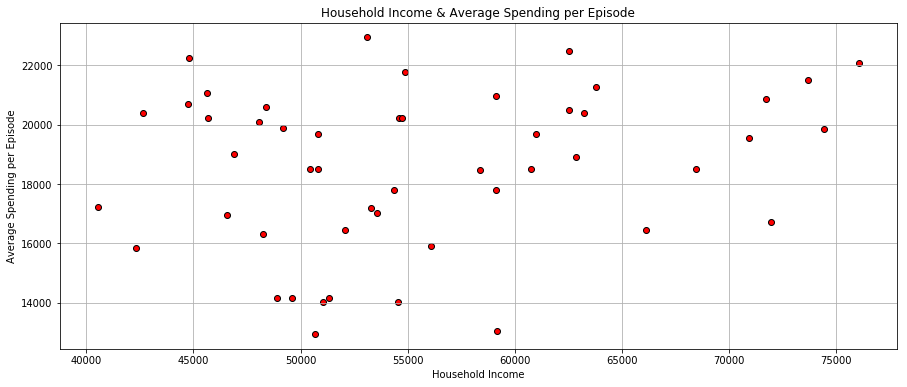

In [188]:
plt.scatter(df11['Household Income'],df11['Avg_Spending_Per_Episode_Hospital'],color="red",edgecolors="black")
plt.title("Household Income & Average Spending per Episode")
plt.xlabel("Household Income")
plt.ylabel("Average Spending per Episode")
plt.grid(True)
plt.show()

In [175]:
df20 = df4.join(df5)
df20 = df20.rename(columns={"Hospital Ownership":"Hospital Count"})
ownership2 = df20.index.tolist
df20 = df20.astype(int)
df20

,Hospital Count,Avg_Spending_Per_Episode_Hospital
Voluntary non-profit - Private,1246,18881
Proprietary,621,19260
Voluntary non-profit - Other,317,18329
Government - Hospital District or Authority,307,17371
Voluntary non-profit - Church,294,19798
Government - Local,170,16935
Physician,51,21608
Government - State,31,20373
Government - Federal,23,14248
Tribal,4,10815


In [180]:
df20.reset_index()

,index,Hospital Count,Avg_Spending_Per_Episode_Hospital
0,Voluntary non-profit - Private,1246,18881
1,Proprietary,621,19260
2,Voluntary non-profit - Other,317,18329
3,Government - Hospital District or Authority,307,17371
4,Voluntary non-profit - Church,294,19798
5,Government - Local,170,16935
6,Physician,51,21608
7,Government - State,31,20373
8,Government - Federal,23,14248
9,Tribal,4,10815


Text(0.5,1,'Hospital Ownership Counts')

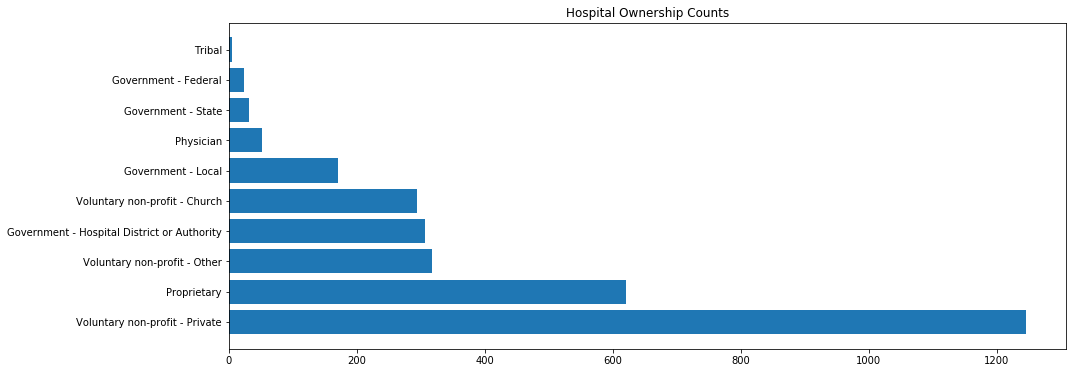

In [185]:
plt.barh(df20.index,df20['Hospital Count'])
plt.title("Hospital Ownership Counts")

Text(0.5,1,'Average Cost per Episode by Hospital Ownership')

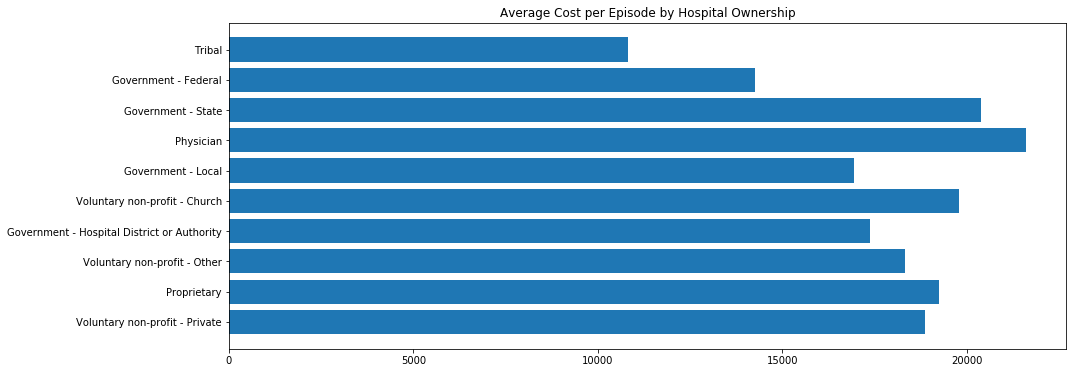

In [187]:
plt.barh(df20.index,df20['Avg_Spending_Per_Episode_Hospital'])
plt.title("Average Cost per Episode by Hospital Ownership")